In [1]:
#Henry Markowitz=Investor should not put all eggs in single basket. 
#He proved existence of an efficient set of portfolios that optimize returns for amount of risk that investors willing to accept.
#Investors invest in those securities that have low correlations between them.
#He assumes investors are rational(expecting high returns) and risk averse(low risk).
#

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data as wb

In [9]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a]= wb.DataReader(a, data_source='yahoo', start ='2010-1-1')['Adj Close']

In [10]:
pf_data.head()

,PG,^GSPC
Date,,
2009-12-31,43.701378,1115.099976
2010-01-04,44.054558,1132.989990
2010-01-05,44.068977,1136.520020
2010-01-06,43.859955,1137.140015
2010-01-07,43.622089,1141.689941


In [11]:
pf_data.tail()

,PG,^GSPC
Date,,
2020-06-03,118.529999,3122.870117
2020-06-04,116.050003,3112.350098
2020-06-05,118.330002,3193.929932
2020-06-08,119.050003,3232.389893
2020-06-09,118.339996,3207.179932


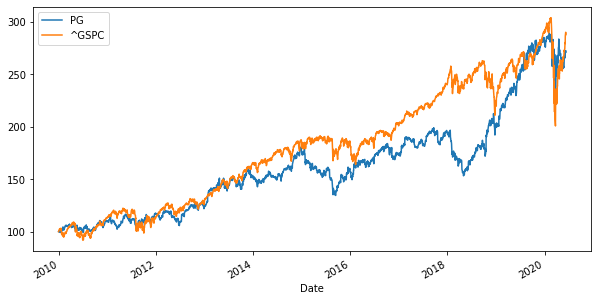

In [16]:
#normalization to 100 and plotting how two assets are performing
norm=pf_data/pf_data.iloc[0]*100

(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5))


In [18]:
norm.head()

,PG,^GSPC
Date,,
2009-12-31,100.000000,100.000000
2010-01-04,100.808167,101.604342
2010-01-05,100.841162,101.920908
2010-01-06,100.362865,101.976508
2010-01-07,99.818568,102.384536


In [15]:
#log returns
log_returns=np.log(pf_data/pf_data.shift(1))
log_returns.head()

,PG,^GSPC
Date,,
2009-12-31,NaN,NaN
2010-01-04,0.008049,0.015916
2010-01-05,0.000327,0.003111
2010-01-06,-0.004754,0.000545
2010-01-07,-0.005438,0.003993


In [14]:
#annualized average log returns
log_returns_a=log_returns.mean()*250
log_returns_a

PG       0.094838
^GSPC    0.100576
dtype: float64

In [33]:
#annualized covariance between log returns of assets 
cov_a=log_returns.cov()*250
cov_a

,PG,^GSPC
PG,0.029531,0.017881
^GSPC,0.017881,0.030334


In [34]:
log_returns.corr()#correlation between log returns of PG and GSPC. HIgh correlation between PG and GSPC.

,PG,^GSPC
PG,1.000000,0.597445
^GSPC,0.597445,1.000000


In [35]:
#what would be weights of assets?.  We wants sum of weights =1 
#lets do experiment
num_assets = len(assets)
num_assets

2

In [36]:
#if we randomly selected weigths, then
arr = np.random.random(2)
arr

array([0.09279021, 0.34772529])

In [37]:
arr[0] + arr[1]#sum not equal to 1

0.44051550525683836

In [38]:
#so we will find sum of weights equal to 1 by using following method
weights = np.random.random(num_assets)
weights /=np.sum(weights)#/= is a incremental operation. #weights=(w1/w1+w2)+(w2/w1+w2)=1
weights

array([0.47574884, 0.52425116])

In [39]:
weights[0]+weights[1]#got sum is equal to 1

1.0

# Expected portfolio return

In [64]:
#sum(weights*annualized average log return
np.sum(weights* log_returns_a)


0.09926051817603876

# Expected portfolio variance

In [65]:
#(w1*sd1+w2*sd2)^2=w1^2*sd1^2+2w1*sd1*sd2*cov()+w2^2*sd2^2

In [66]:
#W^T*Cov*W
exp_port_var= np.dot(weights.T, np.dot(log_returns.cov()*250, weights))
exp_port_var

0.0258913011627511

# Expced portfolio volatility


In [136]:
#sd of expected portfolio variance
exp_port_vol= np.sqrt(exp_port_var)
exp_port_vol

0.16090774115234824

In [137]:
#consider 1000 different combinations fof the smae assets
 #simulate 1000 combinations

In [138]:
#we want to pfolio_returns and pfolio_vol for efficient frontier

In [139]:
#define those objects
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /=np.sum(weights)#(w1/w1+w2)+(w2/w1+w2)=1#got two weights whose sum is 1
    pfolio_returns.append(np.sum(weights* log_returns_a))
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))
    
pfolio_returns, pfolio_volatilities#gives list

([0.09783366897035455,
  0.09636050141333255,
  0.0986266345291123,
  0.09631786520874212,
  0.09877073183045709,
  0.09945501905951931,
  0.09603055453139303,
  0.09576165413190114,
  0.09972200038782954,
  0.09629144562745875,
  0.09805019844271623,
  0.09769549119342319,
  0.09770347156116473,
  0.09858096253298992,
  0.09556460685790523,
  0.09635823260345464,
  0.09853890282867317,
  0.09812996741366689,
  0.097044427613075,
  0.09971389230128018,
  0.09801497457025463,
  0.09855452982314361,
  0.09854539856253905,
  0.09832228227642573,
  0.09663403384999554,
  0.09677917094781588,
  0.09931672129280358,
  0.09635999243692239,
  0.09697923346020362,
  0.09781191781458534,
  0.09803939100870195,
  0.09969169970988287,
  0.09633091997837631,
  0.09785263412389804,
  0.10027439255050709,
  0.09767560366151054,
  0.09800566351679332,
  0.09541858560215906,
  0.09699363728705496,
  0.09843442884577952,
  0.09844455376938382,
  0.09717722089752827,
  0.10000019162411104,
  0.0976432056

In [140]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /=np.sum(weights)#(w1/w1+w2)+(w2/w1+w2)=1#got two weights whose sum is 1
    pfolio_returns.append(np.sum(weights* log_returns_a))
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))
    
pfolio_returns = np.array(pfolio_returns)

pfolio_volatilities=np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09515478, 0.0963322 , 0.09934945, 0.09812392, 0.09676726,
        0.09876348, 0.09751521, 0.10044076, 0.09734075, 0.09629624,
        0.09598266, 0.09794511, 0.09753641, 0.09756946, 0.09543819,
        0.09658895, 0.1002996 , 0.10047753, 0.09784634, 0.0984638 ,
        0.09912426, 0.09867654, 0.09715113, 0.09867331, 0.09779262,
        0.09814625, 0.09599474, 0.09759945, 0.09694847, 0.10057221,
        0.09904395, 0.09971797, 0.09551359, 0.09750885, 0.09975746,
        0.09795224, 0.09742049, 0.09714402, 0.1003117 , 0.09787338,
        0.09490506, 0.10015306, 0.09565153, 0.09945359, 0.10010323,
        0.09606281, 0.09787812, 0.09940039, 0.09759588, 0.09924924,
        0.09982747, 0.09856939, 0.09890308, 0.09776373, 0.09755818,
        0.10003035, 0.09818568, 0.09705208, 0.09720973, 0.0991973 ,
        0.09721202, 0.09797932, 0.09677544, 0.09778458, 0.09635632,
        0.09804484, 0.09679683, 0.09824502, 0.09711995, 0.09701844,
        0.09772355, 0.09906043, 0.09715823, 0.09

In [141]:
portfolio = pd.DataFrame({'Returns':pfolio_returns, 'Volatility':pfolio_volatilities})#dictionary

In [142]:
portfolio.head()

,Returns,Volatility
0,0.095155,0.168284
1,0.096332,0.158425
2,0.099349,0.161592
3,0.098124,0.155218
4,0.096767,0.156276


In [143]:
portfolio.tail()

,Returns,Volatility
995,0.095275,0.167023
996,0.098252,0.155566
997,0.098805,0.157935
998,0.096041,0.160330
999,0.096518,0.157404


Text(0, 0.5, 'Expected Returns')

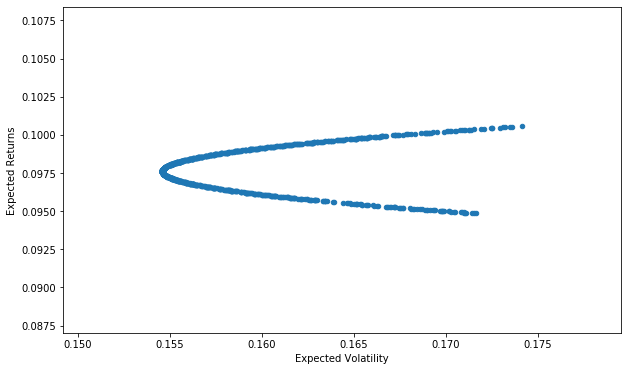

In [145]:
#scatterplot of returns v/s volatility=Markowitz Effiecient Frontier 
portfolio.plot(x='Volatility', y='Returns', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
